In [1]:
from IPython.display import HTML

style = """
<style>
#header, div.unselected { display: none !important }
#notebook, .container { padding: 0 !important }
#site { height: 100% !important }
</style>
"""
style = ""

HTML(style)

# Dữ liệu ảnh chữ số viết tay 

[Nguồn dữ liệu](http://www.amlbook.com/support.html)
<img src="digit_images.png" />

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv("digit-train.txt", sep="\s+", header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [4]:
train_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 257 columns):
0      7291 non-null float64
1      7291 non-null float64
2      7291 non-null float64
3      7291 non-null float64
4      7291 non-null float64
5      7291 non-null float64
6      7291 non-null float64
7      7291 non-null float64
8      7291 non-null float64
9      7291 non-null float64
10     7291 non-null float64
11     7291 non-null float64
12     7291 non-null float64
13     7291 non-null float64
14     7291 non-null float64
15     7291 non-null float64
16     7291 non-null float64
17     7291 non-null float64
18     7291 non-null float64
19     7291 non-null float64
20     7291 non-null float64
21     7291 non-null float64
22     7291 non-null float64
23     7291 non-null float64
24     7291 non-null float64
25     7291 non-null float64
26     7291 non-null float64
27     7291 non-null float64
28     7291 non-null float64
29     7291 non-null float64
30     7291 non-null f

In [5]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,3.903443,-0.996417,-0.981138,-0.951153,-0.887738,-0.773468,-0.610302,-0.368991,-0.045769,-0.052641,...,-0.198547,0.139823,0.116439,-0.314108,-0.653711,-0.837858,-0.922194,-0.957393,-0.979290,-0.994678
std,2.996386,0.051713,0.151202,0.244264,0.360516,0.502659,0.628710,0.716032,0.768304,0.752979,...,0.772895,0.752984,0.757336,0.725859,0.582555,0.414646,0.300830,0.228700,0.158998,0.066056
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-0.950000,...,-1.000000,-0.661500,-0.738000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.719000,0.061000,0.002000,...,-0.353000,0.368000,0.336000,-0.579000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.962000,-0.391000,0.254500,0.696000,0.674500,...,0.554000,0.835000,0.815000,0.346000,-0.504500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,9.000000,0.638000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


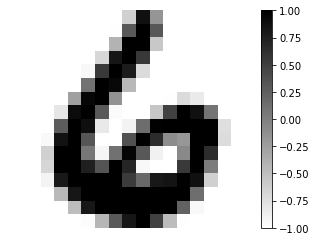

In [6]:
plt.imshow(train_data.iloc[0, 1:].values.reshape(16, 16), cmap=plt.cm.binary)
plt.axis("off")
plt.colorbar()

In [7]:
train_raw_X = train_data.drop(0, axis=1).values
train_raw_X.shape

(7291, 256)

In [8]:
# Ở đây, ta xét bài toán phân 2 lớp: 
# số 1 (y = 1) và không phải số 1 (y = 0)
train_y = (train_data[0] == 1).astype(int).values
print(train_y.shape)
print(train_y[:10])

(7291,)
[0 0 0 0 0 0 0 1 0 1]


Câu hỏi cần trả lời: <font color=blue>output - có phải ảnh chữ số 1 - </font> được tính như thế nào từ <font color=blue>input - ảnh chữ số viết tay (kích thước $16\times16$)</font>?

# Tiền xử lý
Mỗi ảnh hiện giờ được biểu diễn bởi 256 giá trị ứng với 256 pixel. Từ 256 pixel này, ta sẽ tính-toán/rút-trích 2 đặc trưng là "intensity" và "symmetry", và sau đó sẽ dùng 2 đặc trưng này để biểu diễn ảnh.
- "intensity": cho biết giá trị pixel trung bình của ảnh. Ảnh số 1 nhìn chung sẽ có sẽ có "intensity" thấp hơn ảnh các số khác.
- "symmetry" cho biết mức độ đối xứng của ảnh (nếu ảnh tương tự với ảnh lật theo chiều ngang và ảnh lật theo chiều dọc thì tính đối xứng cao). Ảnh số 1 nhìn chung sẽ có tính đối xứng cao hơn ảnh các số khác. Cụ thể, "symmetry" được tính như sau:
    - Lấy ảnh trừ đi ảnh lật theo chiều ngang, lấy trị tuyệt đối, rồi tính trung bình. Gọi kết quả tính được là s1.
    - Lấy ảnh trừ đi ảnh lật theo chiều dọc, lấy trị tuyệt đối, rồi tính trung bình. Gọi kết quả tính được là s2.
    - Symmetry = - (s1 + s2) / 2.

In [9]:
# Định nghĩa class FeatureExtracter theo dạng của 
# Transformer của Sklearn
# Lợi ích: giúp "giao tiếp tốt" với Sklearn

from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureExtracter(BaseEstimator, TransformerMixin):
class FeatureExtracter(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        F = np.empty((len(X), 2))
        F[:, 0] = X.mean(axis=1)
        for r in range(len(X)):
            img = X[r].reshape(16, 16)
            F[r, 1] = -(np.mean(np.abs(img - np.flip(img, axis=0))) + np.mean(np.abs(img - np.flip(img, axis=1)))) / 2
        return F

In [10]:
feature_extracter = FeatureExtracter()
train_X = feature_extracter.transform(train_raw_X)
train_X.shape

(7291, 2)

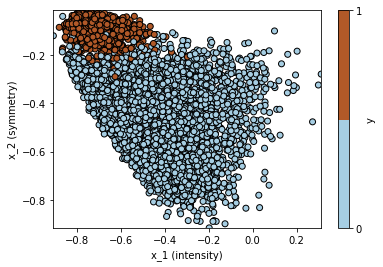

In [11]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
            cmap=plt.cm.get_cmap("Paired", 2), 
            edgecolors="black")
plt.xlabel("x_1 (intensity)")
plt.ylabel("x_2 (symmetry)")
plt.colorbar(ticks=[0, 1], label="y")
x1_min = train_X[:, 0].min()
x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min()
x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max);

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
preprocess_pipeline = Pipeline([("feature_extracter", FeatureExtracter()),
                               ("std_scaler", StandardScaler())])

In [14]:
train_X = preprocess_pipeline.fit_transform(train_raw_X)

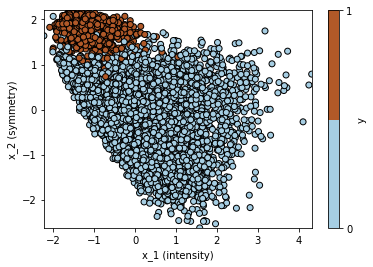

In [15]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
            cmap=plt.cm.get_cmap("Paired", 2), 
            edgecolors="black")
plt.xlabel("x_1 (intensity)")
plt.ylabel("x_2 (symmetry)")
plt.colorbar(ticks=[0, 1], label="y")
x1_min = train_X[:, 0].min()
x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min()
x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max);

# Huấn luyện Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg_model = LogisticRegression()

In [18]:
log_reg_model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
train_preds = log_reg_model.predict(train_X)

In [20]:
np.mean(train_preds != train_y)

0.013029762721163077

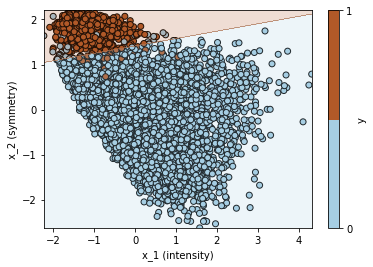

In [21]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
            cmap=plt.cm.get_cmap("Paired", 2), 
            edgecolors="black")
plt.xlabel("x_1 (intensity)")
plt.ylabel("x_2 (symmetry)")
plt.colorbar(ticks=[0, 1], label="y")
x1_min = train_X[:, 0].min()
x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min()
x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

x1x1, x2x2 = np.meshgrid(np.linspace(x1_min, x1_max, 10000), np.linspace(x2_min, x2_max, 5000))
pp = log_reg_model.predict(np.c_[x1x1.reshape(-1), x2x2.reshape(-1)]).reshape(x1x1.shape)
plt.contourf(x1x1, x2x2, pp, cmap=plt.cm.get_cmap("Paired", 2), alpha=0.2);

# Dùng Logistic Regression đã huấn luyện để dự đoán với các ảnh mới

In [22]:
test_data = pd.read_csv("digit-test.txt", sep="\s+", header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [23]:
test_raw_X = test_data.drop(0, axis=1).values
test_raw_X.shape

(2007, 256)

In [24]:
test_y = (test_data[0] == 1).values
test_y.shape

(2007,)

In [25]:
test_X = preprocess_pipeline.transform(test_raw_X)

In [26]:
test_preds = log_reg_model.predict(test_X)

In [27]:
np.mean(test_preds != test_y)

0.019930244145490782

# PCA